## Utility Functions

It is a good practice to keep your utility functions (functions that perform certain operations) separate from your machine learning pipeline. This helps you:

1. Focus on each operation/functionality on its own
2. Better code tracing when something breaks
3. Perform unit testing

In [238]:
### All imports we will need
import cv2
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# use interactive plots
%matplotlib qt 

In [239]:
#### set debug to false when imported from another 
IN_DEBUG=False

## Data Preprocessing Utilities
Functions that implement the preprocessing operations

In [240]:
def preprocess(img):
    # Preprocess the given image img.
    # [1] TODO: Convert the image to grayscale (~1 line)
    # Hint: Check the function cvtColor in opencv.
    greyImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # [2] TODO: Blur the image to remove the noise (apply a 3x3 filter) (~1 line)
    # Hint: Check the function blur in opencv.
    # Hint: Pass the kernel size as an array (3, 3)
    blurred_img = cv2.blur(greyImg, (3, 3))

    # [3] TODO: Convert the grayscale image to a binary image. Apply a threshold between 50 and 255 on the blurred image.
    #       The pixels having values less than 50 will be considered 0, and 255 otherwise. (~1 line)
    # Hint: Check the function threshold in opencv.
    # Hint: Use the type cv2.THRESH_BINARY with the type parameter.
    # Hint: This function has two return parameters. You can ignore the first one, and the second is the binary image.
    # Example: _, thresholded_img = cv2.threshold(....)
    _, thresholded_img = cv2.threshold(blurred_img, 50, 255, cv2.THRESH_BINARY)
    return thresholded_img

In [241]:
if IN_DEBUG:
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    img = cv2.imread('images/rectangle/rec1.png')
    thresholded_img = preprocess(img)
    assert np.all((thresholded_img==255) | (thresholded_img==0)), \
        'Preprocessing is incomplete: the resulting final image should be all 0 or 255'

## Feature Extraction Utilities
Functions that implement feature extractors

> To put in simple words findContours detects change in the image color and marks it as contour. As an example, the image of number written on paper the number would be detected as contour

## Types of modes of return
1. RETR_TREE:
   * this return all the contours in a heirarchy manner, by which we mean that it start from the outer contour, then start to enter to the inner one step by step, so in our case, if we draw a rectangle for example with pen, then it will have certain thickness, the outer boundry will be contour[0] while the inner one will be contour[1]
   * it build a relation with other contours, so each relation consist of 4 numbers:
   * (next, previous, first_child, Parent) as explained in this img
   * 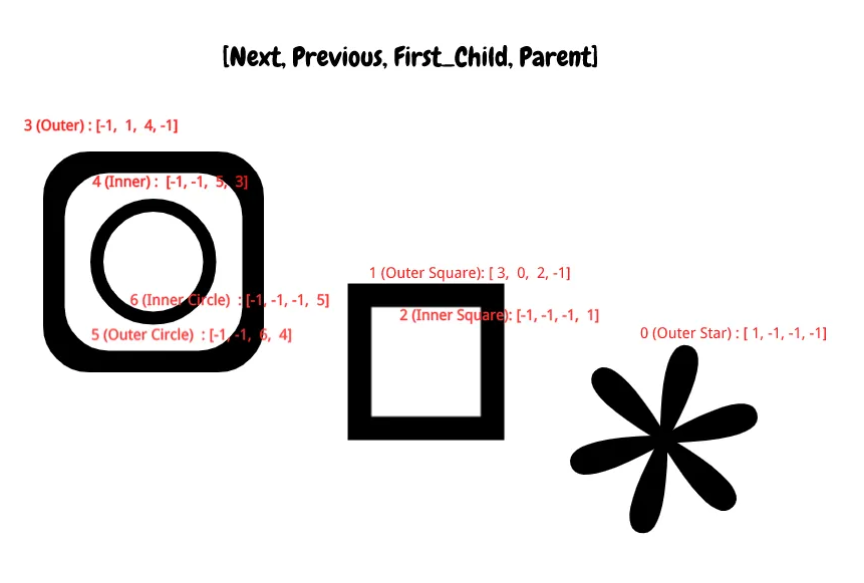
     * next -> represent the next contour, w el next contour da lazm yeb2a fe nfs el lvl, fa msln htla2y el next bta3 el outerstar 1 el hwa el outer square, w el next bta3 el outersquare hwa el outer rounded square bta3 el ig, whakza, lakn fl internal square msh htla2y next 34an el level da mfhosh gher inner contour wa7d bs, lakn msln lw kan gowa mrsom morb3at soghyra gmb b3d msln kan mmkn tla2y next
     * prev -> same as next, but represent the previous contour
     * first_child -> da lw 3ndk 2 nested contours, fa de bt3br 3n el child bta3 el outer contour, fa hatla2y msln en el first_child ll outerSquare lazm ykon 2 34an da el inner square, w blnsba ll outer rounded square hyb2a 4 msln 34an da el first child, lakn el inner rounded hyb2a el first child bta3o 5 34an da el outer circle, w hakaza baa
     * parent -> same as first_child bs bl3ks baa, fa htla2y el parent bta3 el inner square 1 34an da el outer square msln w hakaza baa.
2. RETR_EXTERNAL:
    * this retrieve the external outer contours only.
    * so in the upper image it will detect the star, the other square and the outer rounded square only
    * also you will find in the hirarch of all of them this form (x,y,-1,-1) 
    * that is because they are all at the same level (1)
3.  RETR_LIST : 
    * similar to the tree but create no relations between parents and children (x,y,-1,-1) also
    * but it detect all contours
4.  RETR_CCOMP :
    * Retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.
    * 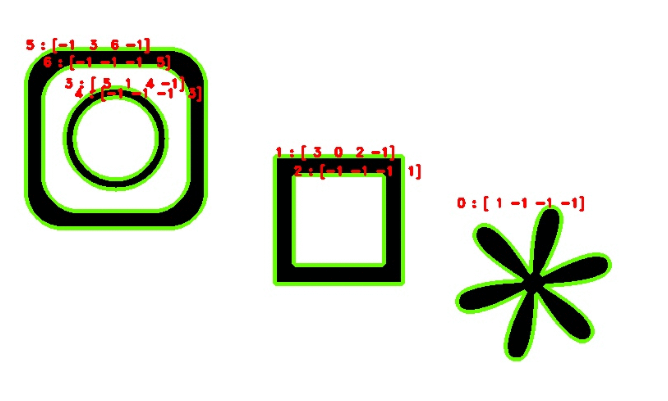
    * fa hena fl sora htla2y en trtebhom b2a mokhtalef 3n el trteb bta3 el tree, fa htla2y fl rounded rectangle en hwa 3ml detection lel circle el awl 34an de hole gowa el rounded rectangle, b3d kdea by3ml detection lel inner circle w b3d keda bytl3 baa, fa hwa byakhodha mn el holes el awl w ygeb el external bta3  el hole, b3d keda el internal w b3den yetl3 ll outer ygeb el external w b3den el internal w hakaza
## Method - (Contour approximation methods)
-> we have two main methods
1. CHAIN_APPROX_NONE:
   * stores absolutely all the contour points
2. CHAIN_APPROX_SIMPLE:
   * compresses horizontal, vertical, and diagonal segments and leaves only their end points. source


##### my refrence: https://medium.com/analytics-vidhya/opencv-findcontours-detailed-guide-692ee19eeb18
-----

### My choice
> depending on all the information I wrote above, and according to this image 

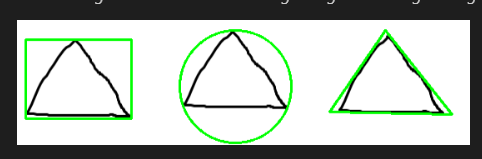 

> I See that we just need to store the end points and need to detect the external contours only 
> so we can use the method -> Chain_approx_simple, 
> and we can use RETR_EXTERNAL as return mode.

### Problem I don't understand
* here when I choose the logical choice (for me atleast) by choosing RETR_EXTERNAL and try to apply it, it returns to me the boarder of the whole window, while when I choose RETR_TREE and choose the contor[1] it returns to me the correct contour, i dont understand why. 

In [242]:
def findContourArea(img):
    # This function finds the contours of a given image and returns it in the variable contours.
    ## understand contours: 
    ### Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. 
    ### The contours are a useful tool for shape analysis and object detection and recognition.
    ### Contours homa el outer border bta3 el shakl.

    # NOTE: This function will not work correctly unless you preprocess the image properly as indicated.
    # contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    print(contours)
    # moment = cv2.moments(contours[1]) # this is how we can get the moment of certain shape
    # cv2.CHAIN_APPROX_NONE => stores all the boundary points.
    # cv2.CHAIN_APPROX_SIMPLE => stores only the corner points.
    #######
    ##Drawing Contours
    #create an empty image for contours
    img_contours = np.zeros(img.shape)
    # draw the contours on the empty image
    cv2.drawContours(img, contours, -1, (255,0,0), 3)
    cv2.imshow('contours', img)
    #######
    ## the function findContours returns an array of contours and their hierarchy,
    ## Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.
    ## the list is sorted in terms of hierarchy, this means the outmost contour is in contours[0], 
    ## and their direct inner contours are in contours[1] and so on and so forth
    ## bm3na lw rasem dayrten gowa b3d, fa el contours[0] hwa el circle el bra wl contours[1] hyb2a el circle el gowa. 
    
    # [4] TODO: Find the contour area of the given image (img) (~1 line)
    # Hint: check the function contourArea in opencv.
    # Hint: think which contour should be passed as argument to the function (which contour we should calculate its area)
    # Hint: the function returns a list of areas, so you should return the first element of the list.
    area = cv2.contourArea(contours[1])
    # areaFromMoment = moment["m00"] # this is how we can get the area from the moment
    # assert area == areaFromMoment 
    return area, contours


## boundingRect() in opencv2
> boundingRect() function of OpenCV is used to draw an approximate rectangle around the binary image. This function is used mainly to highlight the region of interest after obtaining contours from an image.

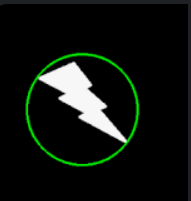

* there are two types of this method 
  1. straight bounding rectangle 
     * Here a simple rectangle is drawn around the contour (ROI). As you can see in the documentation, a green rectangle is drawn around the ROI. Corresponding rectangle coordinates are obtained such that a rectangle completely encloses the contour.
  2. rotated rectangle:
     
     * In this case cv2.minAreaRect() function is used to highlight the minimum rectangular area enclosing a contour.
    cv2.boxPoints() obtains the 4 corner points of the obtained rectangle.
    np.int0() is done to convert the corrdinates from float to integer format.
    These points are then used to draw the rectangle. This is depicted by the red rectangle in the documentation.
    
    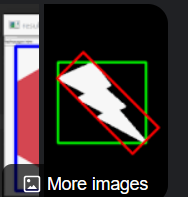
------ 
## return data from boundingRect() 
it returns 4 values: 
1. X coordiante -> starting from the left of the image
2. Y coordinate -> starting from the bottom of the image
3. Width
4. Height
-------
##### my reference: https://www.pythonpool.com/cv2-boundingrect/



In [243]:
def findBoundingRectangleArea(img, contours):
    # This function tries to fit the minimum bounding rectangle for the given contours.

    # [5] TODO: Find the minimum bounding rectangle that can fit the given contours.
    # Hint: Check the function boundingRect in opencv

    # TODO (Optional): You can uncomment the following lines to show or display the bounded rectangle.
    # x,y,w,h = cv2.boundingRect(contours[1])
    x,y,w,h = cv2.boundingRect(contours[1])
    bounding_rectangle = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # # if bounding_rectangle: ## not none
    cv2.imshow('Image_Rec', bounding_rectangle)
    cv2.waitKey(0)
    # [6] TODO: Find the area of the bounding rectangle
    area = w *h
    return area, bounding_rectangle


In [244]:
def findBoundingCircleArea(img, contours):
    # This function tries to fit the minimum bounding circle for the given contours.

    # [7] TODO: Find the minimum enclosing circle that can fit the given contours.
    # Hint: Check the function minEnclosingCircle in opencv

    # TODO (Optional): You can uncomment the following lines to show or display the bounded circle.
    (x,y) , radius = cv2.minEnclosingCircle(contours[1])
    center = (int(x), int(y))
    radius = int(radius)
    bounding_circle = cv2.circle(img, center, radius, (0, 255, 0), 2)
    # # if bounding_circle: ## not none
    cv2.imshow('Image_Circle', bounding_circle)
    cv2.waitKey(0)

    # [8] TODO: Find the area of the bounding circle
    area = math.pi * radius * radius
    return area, (center , radius)


In [245]:
def findBoundingTriangleArea(img, contours):
    # This function tries to fit the minimum bounding triangle for the given contours.

    # [9] TODO: Find the minimum enclosing triangle that can fit the given contours.
    # Hint: Check the function minEnclosingTriangle in opencv and place its output in the variable x

    # TODO (Optional): You can uncomment the following lines to show or display the bounded triangle.
    bounding_triangle = cv2.minEnclosingTriangle(contours[1])
    # drawing the triangle
    # bounding_triangle = cv2.polylines(img.copy(), np.int32([bounding_triangle[1]]), True, (0, 255, 0), 2)
    # if bounding_triangle: ## not none
    # cv2.imshow('Image_Triangle', bounding_triangle)
    # cv2.waitKey(0)

    # [10] TODO: Find the area of the bounding triangle
    area = bounding_triangle[0]
    return area, bounding_triangle

In [246]:
if IN_DEBUG:
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    img = cv2.imread('images/rectangle/rec1.png')
    thresholded_img = preprocess(img) ### assuming this function is behaving correctly
    img_area, img_contours = findContourArea(thresholded_img)
    rect_area, _ = findBoundingRectangleArea(thresholded_img, img_contours)
    circ_area, _ = findBoundingCircleArea(thresholded_img, img_contours)
    tri_area, _ = findBoundingTriangleArea(thresholded_img, img_contours)

    assert round(img_area, 2)==14150.5,\
        f'findContourArea() is incorrect, expected {14150.5} found {img_area}'
    assert round(rect_area, 2)==16120.0, \
        f'findBoundingRectangleArea() is incorrect, expected {16120.0} found {rect_area}'
    assert round(circ_area, 2)==23235.22, \
        f'findBoundingCircleArea() is incorrect, expected {23235.22} found {circ_area}'
    assert round(tri_area,2)==25933.5, \
        f'findBoundingTriangleArea() is incorrect, expected {25933.5} found {tri_area}'

14150.5


In [247]:
def extract_features(img, class_number=None):
    # Given an image img, extract the following features.
    # 1. The ratio between the figure area and the minimum enclosing rectangle.
    # 2. The ratio between the figure area and the minimum enclosing circle.
    # 3. The ratio between the figure area and the minimum enclosing triangle.
    area, contours = findContourArea(img)
    area1, _ = findBoundingRectangleArea(img, contours)
    area2, _ = findBoundingCircleArea(img, contours)
    area3, _ = findBoundingTriangleArea(img, contours)
    features = []
    # [11] TODO: Extract the features and append the class_number (if given) in the beginning of each feature vector.
    # Hint: the features should be in the following order: [class_number, ratio1, ratio2, ratio3]
    if(class_number is not None):
        features.append(class_number)
    features.append(area/area1)
    features.append(area/area2)
    features.append(area/area3)
    
    return features


In [248]:
if IN_DEBUG:
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    expected_features = np.array([1.0, 0.98, 0.66, 0.51]) 
    results = np.array(extract_features(thresholded_img, 1))
    results = np.round(results, 2)
    assert np.all(results == expected_features), \
        f'extract_features() is incorrect'

17144.0
[1.   0.98 0.66 0.51]
[1.   0.98 0.66 0.51]


## Data Plotting Utilities
Functions that implement 3D plots to visualize data

In [249]:
def plot(x, y, z, title='', xlabel='', ylabel='', zlabel='', color_style_str='', label_str='', figure=None, axis=None):
    # [12] TODO: Add title, x_label, y_label, z_label to axis (~4 lines)
    axis.set_title(title)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    axis.set_zlabel(zlabel)

    # [13] TODO: Scatter plot of data points with coordinates (x, y, z) with the corresponding color and label (~1 line)
    axis.scatter3D(x, y, z, color = color_style_str, label = label_str)
    handles, labels = axis.get_legend_handles_labels()

    unique = list(set(labels))
    handles = [handles[labels.index(u)] for u in unique]
    labels = [labels[labels.index(u)] for u in unique]

    axis.legend(handles, labels)

In [250]:
if IN_DEBUG:    
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    np.random.seed(0)
    x = np.random.randint(10, size=8)
    y = np.random.randint(15, size=8)
    z = np.random.randint(20, size=8)
    fig = plt.figure()
    ax = fig.add_subplot('111', projection='3d')
    plot(x, y, z, title='Random Data',
               xlabel='Feature x.', ylabel='Feature y', zlabel='Feature z.', color_style_str='g',
               label_str="Data Points",
               figure=fig, axis=ax)
    plt.show()

**EXPECTED PLOT**
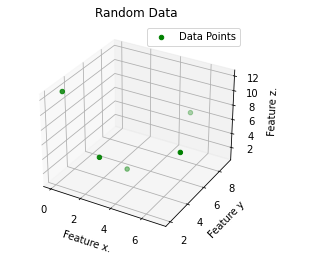

## Classifiers Utilities
Functions that implement the classification algorithms

In [251]:
def calculateDistance(x1, x2):
    # [14] TODO: Calculate the Euclidean distance between the two vectors x1 and x2. (~ 1 line)
    distance =  math.dist(x1,x2)
    # distance = np.linalg.norm(x1 - x2) 
    return distance

In [252]:
def MinimumDistanceClassifier(test_point, training_points):
    # [15] TODO: Implement the minumum distance classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.
    listClass1 = []
    listClass2 = []
    listClass3 = []
    for t  in training_points:
        if(t[0] == 1):
            listClass1.append(t[1:]) # to neglect the 
        elif(t[0] == 2):
            listClass2.append(t[1:])
        else:
            listClass3.append(t[1:])
    mean1 = np.mean(listClass1, axis=0)
    mean2 = np.mean(listClass2, axis=0)
    mean3 = np.mean(listClass3, axis=0)
    distance1 = calculateDistance(test_point, mean1)
    distance2 = calculateDistance(test_point, mean2)
    distance3 = calculateDistance(test_point, mean3)

    classification = np.argmin([distance1, distance2, distance3]) + 1
    return classification

In [253]:
distance = []
def NearestNeighbor2(test_point, all_points):
    # [16] TODO: Implement the Nearest Neighbour classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.
    for t  in all_points:
        distance.append((calculateDistance(test_point, t[1:]), t[0]))
    
    sortedArr = np.sort(distance, axis=0)

    classification = sortedArr[0][1]
    return classification

In [254]:
def NearestNeighbor(test_point, all_points):
    # [16] TODO: Implement the Nearest Neighbour classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.
    
    classification=all_points[0][0]

    index=0
    re_index=0
    d=calculateDistance(test_point,all_points[0][1:])                        
    for vect in all_points[1:]:
        index+=1
        d2=calculateDistance(test_point,vect[1:])
        if d2<d:
            d=d2
            classification=vect[0]
            re_index=index
    
    return classification,re_index

In [255]:
def KNN2(test_point, all_points, k):
    # [17] TODO: Implement the K-Nearest Neighbour classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.
    class1 = 0
    class2 = 0
    class3 = 0
    for i in range (0,k):
        if(distance[i][1] == 1):
            class1+=1
        elif (distance[i][1] == 2):
            class2+=1
        else:
            class3+=1
    classification = np.argmin([class1, class2, class3]) + 1
    return classification

In [256]:
def KNN(test_point, all_points, k):
    # [17] TODO: Implement the K-Nearest Neighbour classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.
    test_bench=np.copy(all_points)
 
    x=[]
    for y in range(k):
        clas,ind=NearestNeighbor(test_point,test_bench)
        x.append(clas)    
        test_bench=np.delete(test_bench,ind,axis=0)
        
    classification = max(set(x), key = x.count)
    return classification

## Model Testing Utilities
Functions that help in the classification algorithms' testing

In [257]:
def get_class_from_file_name(file_name):
    return file_name.split("test\\")[1].split(".")[0]


def get_class_name(class_number):
    classes = ["", "Rectangle", "Circle", "Triangle"]
    return classes[int(class_number)]